In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import japanize_matplotlib
from scipy import signal


In [2]:
# グラフを描画する
def plot(
    df,
    heads=[],
    title=None,
    xlabel=None,
    ylabel=None,
    figsize=(10, 3),
    xlim=(0, 0),
    ylim=(0, 0),
    grid=True,
    peek=False,
):
    fig = plt.figure(figsize=figsize)

    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    if grid:
        plt.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5)

    if xlim[0] < xlim[1]:
        plt.xlim(xlim[0], xlim[1])
    if ylim[0] < ylim[1]:
        plt.ylim(ylim[0], ylim[1])

    for head in heads:
        plt.plot(df[head[0]], df[head[1]], label=head[1])

    plt.legend()

    plt.show()


In [3]:
# CSVファイルを読み込む
file_path = "./2023-12/walk//"

df_acc = pd.read_csv(
    f"{file_path}Accelerometer.csv",
    header=0,
    names=("time", "x", "y", "z")
)

df_gyro = pd.read_csv(
    f"{file_path}Gyroscope.csv",
    header=0,
    names=("time", "x", "y", "z")
)

df_pressure = pd.read_csv(
    f"{file_path}Pressure.csv",
    header=0,
    names=("time", "pressure")
)


In [4]:
# 加速度のノルムを計算する
df_acc['norm'] = np.linalg.norm(df_acc[['x', 'y', 'z']], axis=1)

# 角速度から角度を計算
sampling_rate = df_gyro.shape[0] / (df_gyro["time"].max() - df_gyro["time"].min())
df_gyro['rotate_x'] = np.cumsum(df_gyro['x']) / sampling_rate
df_gyro['rotate_y'] = np.cumsum(df_gyro['y']) / sampling_rate
df_gyro['rotate_z'] = np.cumsum(df_gyro['z']) / sampling_rate


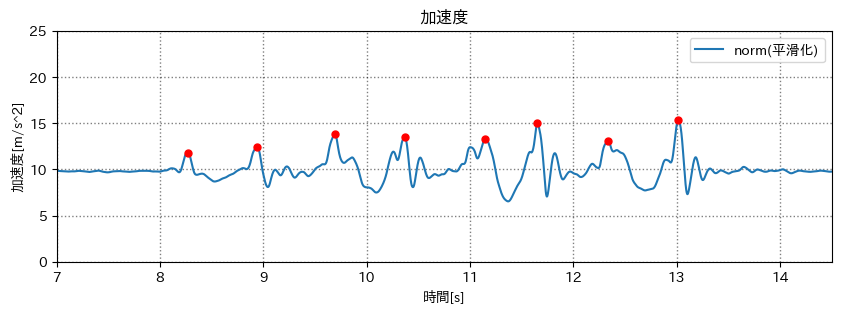

In [26]:
# オリジナル

df_copy = df_acc.copy()

# norm に移動平均フィルタを適用する
df_copy['norm_low'] = df_copy['norm'].rolling(40).mean()

xlim = (7, 14.5)

fig = plt.figure(figsize=(10, 3))

plt.title('加速度')
plt.xlabel('時間[s]')
plt.ylabel('加速度[m/s^2]')
plt.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5)

plt.xlim(xlim[0], xlim[1])
plt.ylim(0, 25)

# plt.plot(df_copy['time'], df_copy['x'], label='x')
# plt.plot(df_copy['time'], df_copy['y'], label='y')
# plt.plot(df_copy['time'], df_copy['z'], label='z')
plt.plot(df_copy['time'], df_copy['norm_low'], label='norm(平滑化)')
# plt.plot(df_copy['time'], df_copy['norm'], label='norm')

peek, _ = signal.find_peaks(df_copy['norm_low'], height=11, distance=100)
plt.scatter(df_copy['time'][peek], df_copy['norm_low'][peek], s=25, color='red', zorder=2)
# peek, _ = signal.find_peaks(df_copy['norm'], height=12, distance=50)
# plt.scatter(df_copy['time'][peek], df_copy['norm'][peek], s=25, color='red', zorder=2)

plt.legend()

plt.show()

In [6]:
xlim = (7, 14.5)


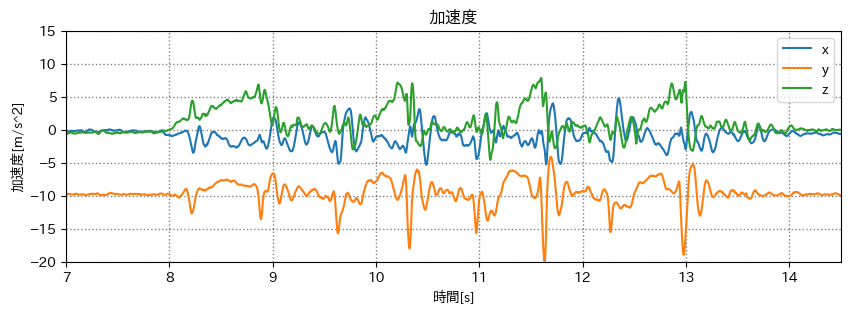

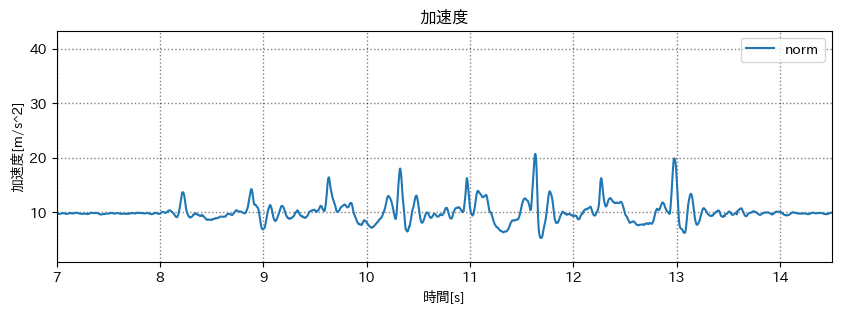

In [7]:
# 加速度
plot(
    df_acc,
    [
        ("time", "x"),
        ("time", "y"),
        ("time", "z"),
    ],
    title="加速度",
    xlabel="時間[s]",
    ylabel="加速度[m/s^2]",
    figsize=(10, 3),
    xlim=xlim,
    ylim=(-20, 15),
    grid=True
)


# 加速度
plot(
    df_acc,
    [
        ("time", "norm"),
    ],
    title="加速度",
    xlabel="時間[s]",
    ylabel="加速度[m/s^2]",
    figsize=(10, 3),
    xlim=xlim,
    ylim=(0, 0),
    grid=True,
)


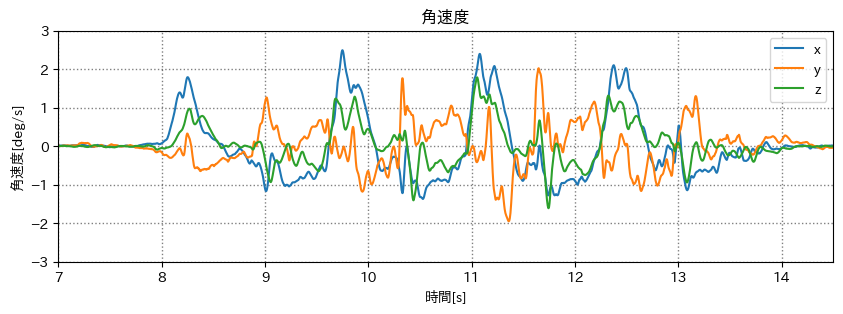

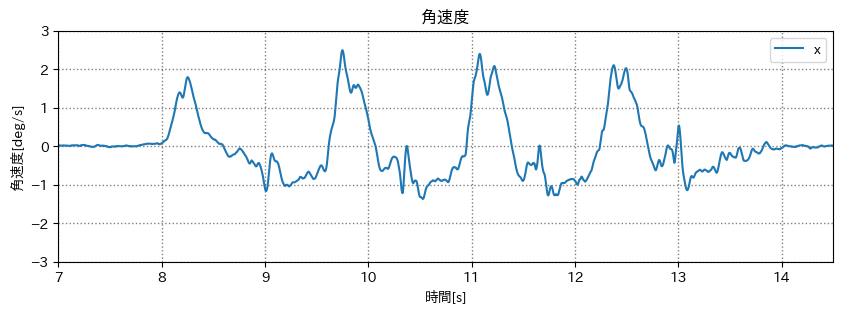

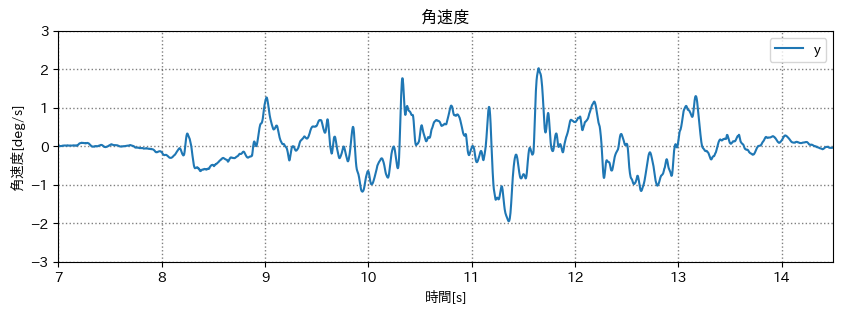

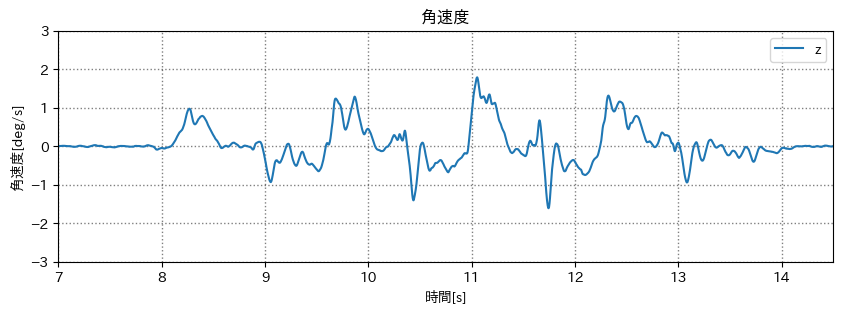

In [8]:
# 角速度
plot(
    df_gyro,
    [("time", "x"), ("time", "y"), ("time", "z")],
    title="角速度",
    xlabel="時間[s]",
    ylabel="角速度[deg/s]",
    figsize=(10, 3),
    xlim = xlim,
    ylim = (-3, 3),
    grid=True
)

plot(
    df_gyro,
    [("time", "x")],
    title="角速度",
    xlabel="時間[s]",
    ylabel="角速度[deg/s]",
    figsize=(10, 3),
    xlim = xlim,
    ylim = (-3, 3),
    grid=True
)

plot(
    df_gyro,
    [("time", "y")],
    title="角速度",
    xlabel="時間[s]",
    ylabel="角速度[deg/s]",
    figsize=(10, 3),
    xlim = xlim,
    ylim = (-3, 3),
    grid=True
)

plot(
    df_gyro,
    [("time", "z")],
    title="角速度",
    xlabel="時間[s]",
    ylabel="角速度[deg/s]",
    figsize=(10, 3),
    xlim = xlim,
    ylim = (-3, 3),
    grid=True
)


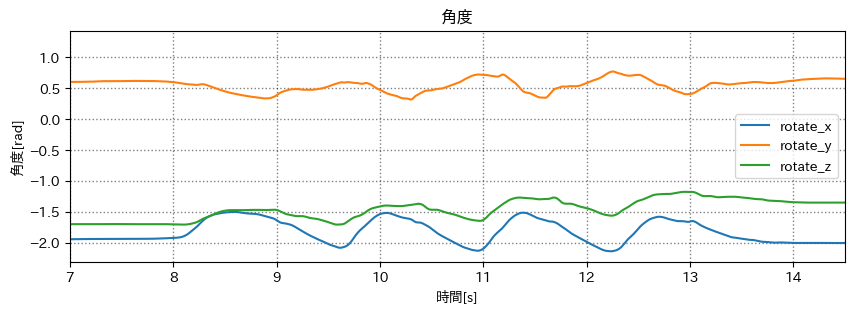

In [9]:
# 角度
plot(
    df_gyro,
    [("time", "rotate_x"), ("time", "rotate_y"), ("time", "rotate_z")],
    title="角度",
    xlabel="時間[s]",
    ylabel="角度[rad]",
    figsize=(10, 3),
    xlim = xlim,
    grid=True
)


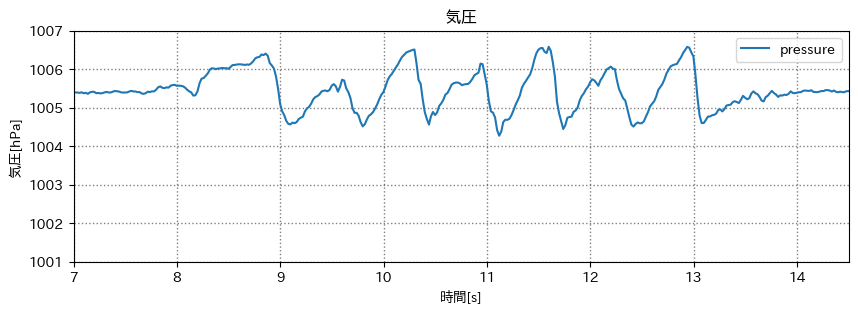

In [10]:
# 気圧
plot(
    df_pressure,
    [("time", "pressure")],
    title="気圧",
    xlabel="時間[s]",
    ylabel="気圧[hPa]",
    figsize=(10, 3),
    xlim=xlim,
    ylim=(1001, 1007),
    grid=True
)
